# Team-Work Project-1

In [52]:
import numpy as np       # For numerical operations
import pandas as pd      # For data manipulation
import matplotlib.pyplot as plt  # For plotting and visualizations
import seaborn as sns    # For statistical plotting

In [35]:
# load the dataset
df = pd.read_csv(r'C:\Users\guddu\data file\covid_toy.csv')

In [36]:
# Display the first 5 rows of the DataFrame
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [37]:
# Display the shape of the DataFrame (rows, columns)
df.shape

(100, 6)

In [38]:
# Display concise summary of the DataFrame
df.info

<bound method DataFrame.info of     age  gender  fever   cough       city has_covid
0    60    Male  103.0    Mild    Kolkata        No
1    27    Male  100.0    Mild      Delhi       Yes
2    42    Male  101.0    Mild      Delhi        No
3    31  Female   98.0    Mild    Kolkata        No
4    65  Female  101.0    Mild     Mumbai        No
..  ...     ...    ...     ...        ...       ...
95   12  Female  104.0    Mild  Bangalore        No
96   51  Female  101.0  Strong    Kolkata       Yes
97   20  Female  101.0    Mild  Bangalore        No
98    5  Female   98.0  Strong     Mumbai        No
99   10  Female   98.0  Strong    Kolkata       Yes

[100 rows x 6 columns]>

In [39]:
# Display a statistical summary of the numerical columns in the DataFrame
df.describe()

,age,fever
count,100.000000,90.000000
mean,44.220000,100.844444
std,24.878931,2.054926
min,5.000000,98.000000
25%,20.000000,99.000000
50%,45.000000,101.000000
75%,66.500000,102.750000
max,84.000000,104.000000


In [40]:
# Display the data types of each column
df.dtypes

age            int64
gender        object
fever        float64
cough         object
city          object
has_covid     object
dtype: object

In [41]:
# Display the number of missing (null) values in each column
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [42]:
# Import the SimpleImputer class to handle missing values
from sklearn.impute import SimpleImputer

# Create an imputer for numerical columns using the mean strategy
si1 = SimpleImputer(strategy='mean')  # Replaces missing numeric values with the column mean

# Create an imputer for categorical columns using the most frequent (mode) strategy
si2 = SimpleImputer(strategy='most_frequent')  # Replaces missing categorical values with the most frequent value

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column has any missing values
    if df[col].isnull().sum() > 0:
        # If the column is categorical (object type), use si2 (most frequent)
        if df[col].dtypes == 'object':
            df[[col]] = si2.fit_transform(df[[col]])  # Transform and replace the missing values
        else:
            # If the column is numerical, use si1 (mean)
            df[[col]] = si1.fit_transform(df[[col]])  # Transform and replace the missing values

In [43]:
# again check the missing values
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [44]:
# drop the N/A, null values
df.dropna(how='all', inplace=True)

## Apply Visualization on Dataset

C:\Users\guddu\AppData\Local\Temp\ipykernel_15096\528703580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='has_covid', palette='coolwarm')


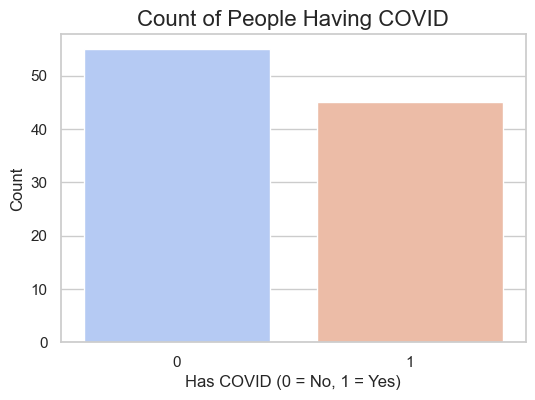

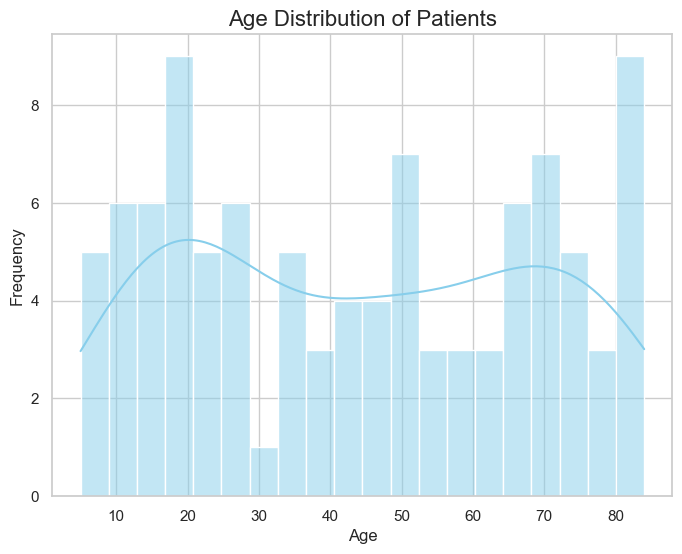

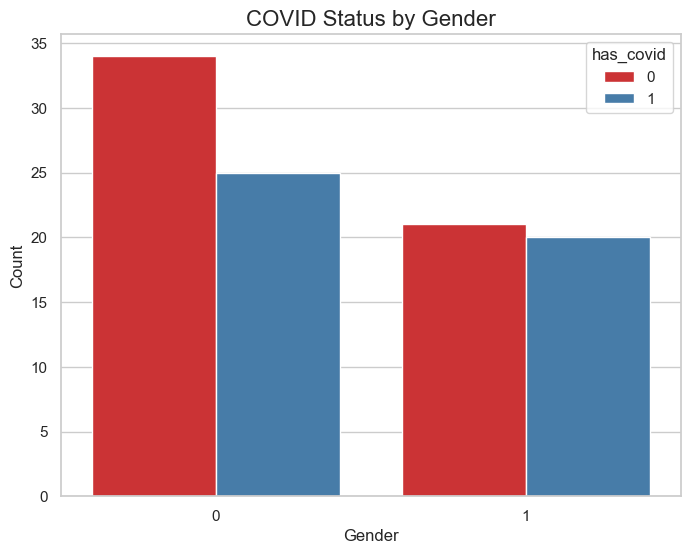

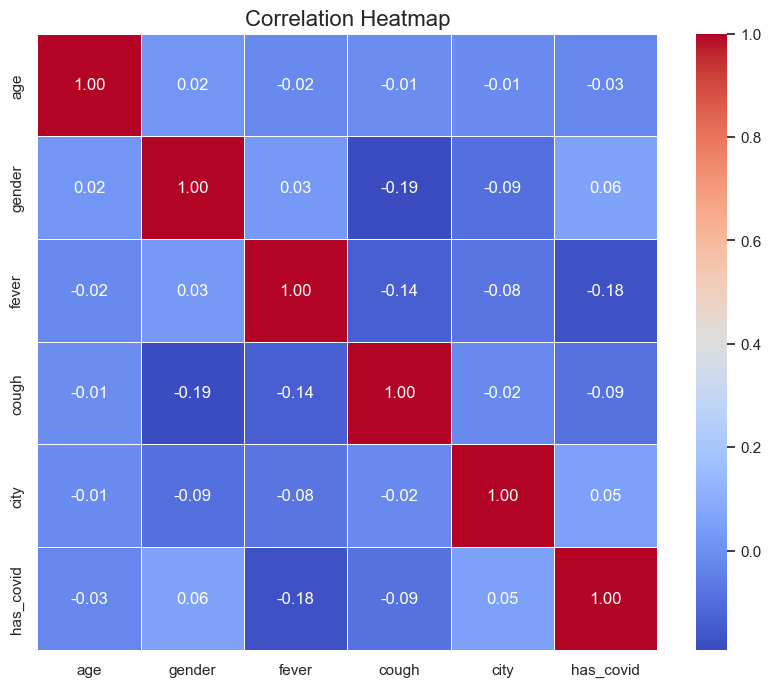

C:\Users\guddu\AppData\Local\Temp\ipykernel_15096\528703580.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='has_covid', y='age', palette='Set2')


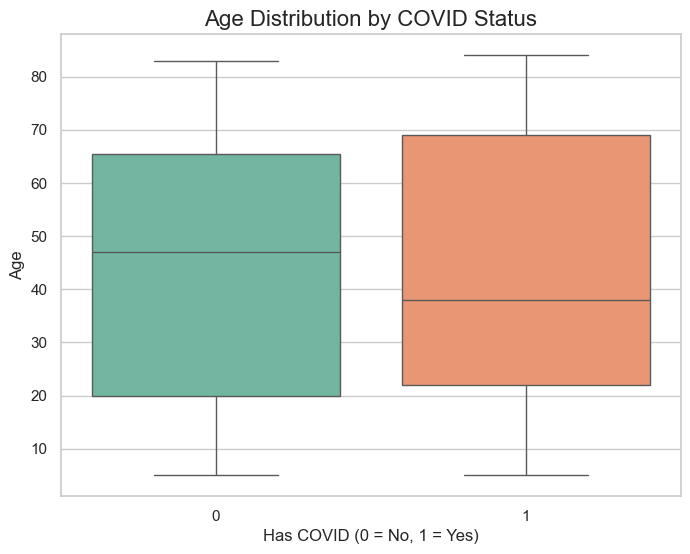

In [54]:
# Setting the style for seaborn
sns.set(style="whitegrid")

# 1. Count of people having COVID (binary classification)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='has_covid', palette='coolwarm')
plt.title('Count of People Having COVID', fontsize=16)
plt.xlabel('Has COVID (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 2. Distribution of a numerical feature (e.g., Age)
plt.figure(figsize=(8,6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Patients', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Distribution of COVID patients by Gender (Categorical Feature)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='gender', hue='has_covid', palette='Set1')
plt.title('COVID Status by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 4. Correlation Heatmap (for numerical features)
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 5. Boxplot to show feature distribution across COVID status (e.g., Age)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='has_covid', y='age', palette='Set2')
plt.title('Age Distribution by COVID Status', fontsize=16)
plt.xlabel('Has COVID (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

## Now, we are Applying Feature Engineering 

In [45]:
# Encode the Categorical type data

from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from scikit-learn

lb = LabelEncoder()  # Create a LabelEncoder object

# Loop through all columns in the DataFrame
for col in df.columns:
    # Check if the column data type is 'object' (i.e., categorical)
    if df[col].dtypes == 'object':
        # Apply Label Encoding to convert categories to numeric labels
        # Example: ['yes', 'no'] → [1, 0]
        df[col] = lb.fit_transform(df[col])

# Display the first 5 rows of the transformed DataFrame
df.head()

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,0
1,27,1,100.0,0,1,1
2,42,1,101.0,0,1,0
3,31,0,98.0,0,2,0
4,65,0,101.0,0,3,0


## Training and Testing of the Dataset

In [46]:
from sklearn.model_selection import train_test_split    # For splitting datasets

# Separate the independent (features) and dependent (target) variables
x = df.drop(columns=['has_covid'])  # Independent variables (features)
y = df['has_covid']                 # Dependent variable (target)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
np.round(x_train.describe(),2)

,age,gender,fever,cough,city
count,80.00,80.00,80.00,80.00,80.00
mean,42.91,0.41,100.98,0.40,1.30
std,24.47,0.50,1.93,0.49,1.12
min,5.00,0.00,98.00,0.00,0.00
25%,20.00,0.00,100.00,0.00,0.00
50%,42.00,0.00,101.00,0.00,1.00
75%,65.00,1.00,102.00,1.00,2.00
max,84.00,1.00,104.00,1.00,3.00


## Now, we are apply Standardization

#### where, mean = 0 and standardization = 1

In [48]:
from sklearn.preprocessing import StandardScaler    # For scaling data

sc = StandardScaler()  # Create a scaler object

# Fit to training data and transform it
x_train_sc = sc.fit_transform(x_train)

# Convert the scaled numpy array back into a DataFrame with original column names
x_train_new = pd.DataFrame(x_train_sc, columns=x_train.columns)

# Round the description stats to 2 decimal places
np.round(x_train_new.describe(), 2)

,age,gender,fever,cough,city
count,80.00,80.00,80.00,80.00,80.00
mean,-0.00,0.00,-0.00,-0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01
min,-1.56,-0.84,-1.56,-0.82,-1.17
25%,-0.94,-0.84,-0.51,-0.82,-1.17
50%,-0.04,-0.84,0.01,-0.82,-0.27
75%,0.91,1.19,0.53,1.22,0.63
max,1.69,1.19,1.57,1.22,1.53


## Now, we are apply Normalization(MinMaxScaler)

#### where, min = 0 and max = 1

In [49]:
# Normalize the numerical data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler  # Import the MinMaxScaler class

sc = MinMaxScaler()  # Create a scaler object to scale features to a given range (default 0 to 1)

# Fit the scaler to the training data and transform it
# This rescales the feature values to lie between 0 and 1
x_train_sc = sc.fit_transform(x_train)

# Convert the transformed NumPy array back into a DataFrame with the original column names
x_train_new = pd.DataFrame(x_train_sc, columns=x_train.columns)

# View the summary statistics of the scaled features, rounded to 2 decimal places
# All values will be in the range [0, 1]
np.round(x_train_new.describe(), 2)

,age,gender,fever,cough,city
count,80.00,80.00,80.00,80.00,80.00
mean,0.48,0.41,0.50,0.40,0.43
std,0.31,0.50,0.32,0.49,0.37
min,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.00,0.33,0.00,0.00
50%,0.47,0.00,0.50,0.00,0.33
75%,0.76,1.00,0.67,1.00,0.67
max,1.00,1.00,1.00,1.00,1.00


## Now, we are apply LogisticRegression

In [50]:
# Import the LogisticRegression model
from sklearn.linear_model import LogisticRegression     # For machine learning models

# Create a LogisticRegression object (used for binary or multi-class classification)
lr = LogisticRegression()

# Fit (train) the model using the training data
lr.fit(x_train, y_train)

# Predict the target values for the test set
y_pred = lr.predict(x_test)

# Import accuracy_score to evaluate model performance
from sklearn.metrics import accuracy_score  # accuracy_score is used to evaluate classification models

# Compare predicted values with actual values and calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.75


## And Now, we are apply Hyperparameter Fine-Tuning

In [51]:
# Define the hyperparameter grid for Logistic Regression
param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
        'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength (smaller values = stronger regularization)
        'solver': ['lbfgs', 'newton-sg', 'liblinear', 'sag', 'saga'],  # Optimization algorithms
        'max_iter': [100, 1000, 2500, 5000]  # Maximum number of iterations for solver to converge
    }
]

from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning

# Initialize GridSearchCV with logistic regression, parameter grid, 3-fold cross-validation
clf = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

# Fit the model on training data to find the best combination of parameters
best_clf = clf.fit(x_train, y_train)

# Display the best model with optimal hyperparameters
best_model = best_clf.best_estimator_
print("Best Estimator:", best_model)

# Print the training accuracy of the best model
print(f'Accuracy on training set: {best_clf.score(x_train, y_train):.3f}')


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
Best Estimator: LogisticRegression(C=np.float64(0.03359818286283781), solver='sag')
Accuracy on training set: 0.550


C:\Users\guddu\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3360 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\guddu\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\guddu\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\guddu\AppData\Roaming\Python\Python313\s